In [1]:
import numpy as np
from pylab import *
import matplotlib

import pandas 

import datetime




In [2]:
# 2022-11-21 20:00:00

def parsetime(s):
    v=s
    try:
        v=s.decode("utf-8")
    except AttributeError: 
        pass
    return np.datetime64(
        datetime.datetime.strptime(v, '%Y-%m-%d  %H:%M:%S'))

r = parsetime("2022-11-21 20:00:00")

r.astype(np.float64)

1669060800000000.0

In [41]:
dat = np.loadtxt("spec1-Explore-data-as-joinbyfield-2023-06-12 10_56_59.csv", skiprows=1, 
                  delimiter=",")

msec,b,r,z = dat.T
hr = msec / 1e3 / 60 / 60
hr -= hr[0]

 
2.24e-07 x + 1.623e-05
 
1.427e-07 x + 1.094e-05
 
2.718e-07 x + 1.834e-05


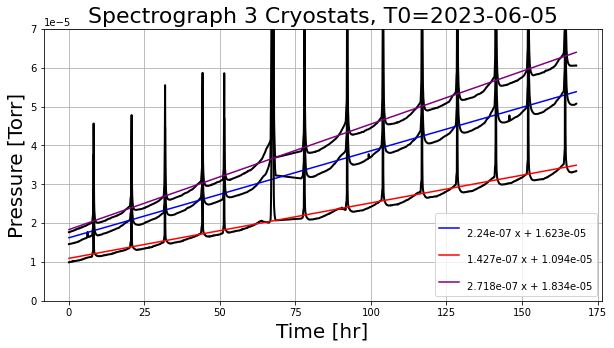

In [42]:

def doit(roi, hr, P, color='red'):
    """ Plot and fit across a roi(slice) of Pressure versus time (hr)"""
    plot(hr[roi], P[roi], lw=2, color='black')
    ff = np.poly1d(np.polyfit(hr[roi], P[roi], 1))
    line, = plot(hr[roi], ff(hr[roi]), color=color)
    line.set_label(str(ff))
    xlabel("Time [hr]", fontsize=20)
    ylabel("Pressure [Torr]", fontsize=20)
    print(ff)

figure(figsize=(10,5))
title("Spectrograph 3 Cryostats, T0=2023-06-05", fontsize=22)
doit(slice(None,None), hr, b, color='blue')
doit(slice(None,None), hr, r, color='red')
doit(slice(None,None), hr, z, color='purple')
legend()
ylim(0,7e-5)
grid(True)






In [28]:
1e-4/2.24e-7

446.42857142857144

In [29]:
446/24

18.583333333333332